#### Deep Learning Jump Start with Azure Databricks
##### Problem Statement:
###### Build and Train a Deep Convolution Network to Classify Images in the CIFAR10 dataset using Keras on Azure Databricks

##### The CIFAR-10 dataset:
The CIFAR-10 dataset consists of **60000 32x32** colour images in **10 classes**, with **6000** images per class. There are **50000** training images and **10000** test images. 
<br>
###### Image Classes Example
<img src="https://github.com/AbidGuroo/DeepLearningJumpstart/blob/master/media/CIFAR10.png?raw=true" alt="CIFAR10" width="500"/><br>
_CIFAR : Canadian Institute For Advanced Research_
<br>

<img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png" alt="Keras" width="200"/>
##### **Keras** is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. 
* In this Technical Lab we will use Tensorflow as the backend for Keras

Keras is one of the leading frameworks to build deep learning models, It

1. Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
2. Supports both convolutional networks and recurrent networks, as well as combinations of the two.
3. Runs seamlessly on CPU and GPU.

#### Useful Shortcuts
##### 1. EDIT Cell --  < ENTER >
##### 2. Execute Cell -- < CTRL > + < ENTER >
##### 3. Execute Cell move to next -- < SHIFT > + < ENTER >
##### 4. Scroll Down - < SPACEBAR >
##### 5. Scroll UP - < SHIFT > + < SPACEBAR >

##### Step 1 - Library Import & general setup
* Keras
* Keras Preprocessing
* Keras Models
* Keras Layers
* Matplotlib

In [4]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

Using TensorFlow backend.

###### Validate GPU accessibility

In [6]:
# Test to Validate Tensorflow can access GPU
from tensorflow.python.client import device_lib
assert 'GPU' in str(device_lib.list_local_devices())

# Test to Validate Keras can access GPU
from keras import backend
assert len(backend.tensorflow_backend._get_available_gpus()) > 0

###### Define Helper functions for plots and image display

In [8]:
def plotmetrics(history):
  width = 10
  height = 5
  ## Clear plot if repeated call
  plt.clf()
  plt.figure(figsize=(width, height))
  # Plot training & validation accuracy values
  plt.title('Model Metrics : Non Augmented Data')
  plt.subplot(1, 2, 1)
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  # Plot training & validation loss values
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  pltoutput = plt.show()
  return pltoutput

In [9]:
def plotImages( images_arr, n_images=8):
    fig, axes = plt.subplots(n_images, n_images, figsize=(9,9))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
    
        ax.imshow( img, cmap="Greys_r")
        ax.set_xticks(())
        ax.set_yticks(())
    plot = plt.tight_layout()
    return plot

##### Step 2 - Load and process CIFAR 10 Dataset

In [11]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

Downloading data from https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

 8192/170498071 [..............................] - ETA: 5:21
 434176/170498071 [..............................] - ETA: 30s 
 1466368/170498071 [..............................] - ETA: 14s
 2875392/170498071 [..............................] - ETA: 10s
 4341760/170498071 [..............................] - ETA: 8s 
 5496832/170498071 [..............................] - ETA: 8s
 6594560/170498071 [>.............................] - ETA: 8s
 7577600/170498071 [>.............................] - ETA: 8s
 8462336/170498071 [>.............................] - ETA: 8s
 9494528/170498071 [>.............................] - ETA: 8s
 10199040/170498071 [>.............................] - ETA: 8s
 10903552/170498071 [>.............................] - ETA: 8s
 11689984/170498071 [=>............................] - ETA: 8s
 12492800/170498071 [=>............................] - ETA: 8s
 13246464/170498071 [=>............................] - ETA: 8s
 13983744/170498071 [=>............................] - ETA: 8s
 14753792/170498071 [=>............................] - ETA: 8s
 15507456/170498071 [=>............................] - ETA: 9s
 16277504/170498071 [=>............................] - ETA: 9s
 17113088/170498071 [==>...........................] - ETA: 9s
 17948672/170498071 [==>...........................] - ETA: 8s
 18735104/170498071 [==>...........................] - ETA: 8s
 19570688/170498071 [==>...........................] - ETA: 8s
 20406272/170498071 [==>...........................] - ETA: 8s
 21241856/170498071 [==>...........................] - ETA: 8s
 22077440/170498071 [==>...........................] - ETA: 8s
 22913024/170498071 [===>..........................] - ETA: 8s
 23797760/170498071 [===>..........................] - ETA: 8s
 24666112/170498071 [===>..........................] - ETA: 8s
 25550848/170498071 [===>..........................] - ETA: 8s
 26451968/170498071 [===>..........................] - ETA: 8s
 27402240/170498071 [===>..........................] - ETA: 8s
 28270592/170498071 [===>..........................] - ETA: 8s
 29188096/170498071 [====>.........................] - ETA: 8s
 30089216/170498071 [====>.........................] - ETA: 8s
 30990336/170498071 [====>.........................] - ETA: 8s
 31907840/170498071 [====>.........................] - ETA: 8s
 32858112/170498071 [====>.........................] - ETA: 8s
 33792000/170498071 [====>.........................] - ETA: 8s
 34775040/170498071 [=====>........................] - ETA: 7s
 35741696/170498071 [=====>........................] - ETA: 7s
 36659200/170498071 [=====>........................] - ETA: 7s
 37609472/170498071 [=====>........................] - ETA: 7s
 38608896/170498071 [=====>........................] - ETA: 7s
 39542784/170498071 [=====>........................] - ETA: 7s
 40574976/170498071 [======>.......................] - ETA: 7s
 41541632/170498071 [======>.......................] - ETA: 7s
 42573824/170498071 [======>.......................] - ETA: 7s
 43606016/170498071 [======>.......................] - ETA: 7s
 44605440/170498071 [======>.......................] - ETA: 7s
 45654016/170498071 [=======>......................] - ETA: 7s
 46637056/170498071 [=======>......................] - ETA: 7s
 47734784/170498071 [=======>......................] - ETA: 6s
 48734208/170498071 [=======>......................] - ETA: 6s
 49831936/170498071 [=======>......................] - ETA: 6s
 50864128/170498071 [=======>......................] - ETA: 6s
 51929088/170498071 [========>.....................] - ETA: 6s
 53043200/170498071 [========>.....................] - ETA: 6s
 54108160/170498071 [========>.....................] - ETA: 6s
 55238656/170498071 [========>.....................] - ETA: 6s
 56336384/170498071 [========>.....................] - ETA: 6s
 57417728/170498071 [=========>....................] - ETA: 6s
 58515456/170498071 [=

##### Display Training Image Samples (#100)
Here is a sample of the actual images from the Training set

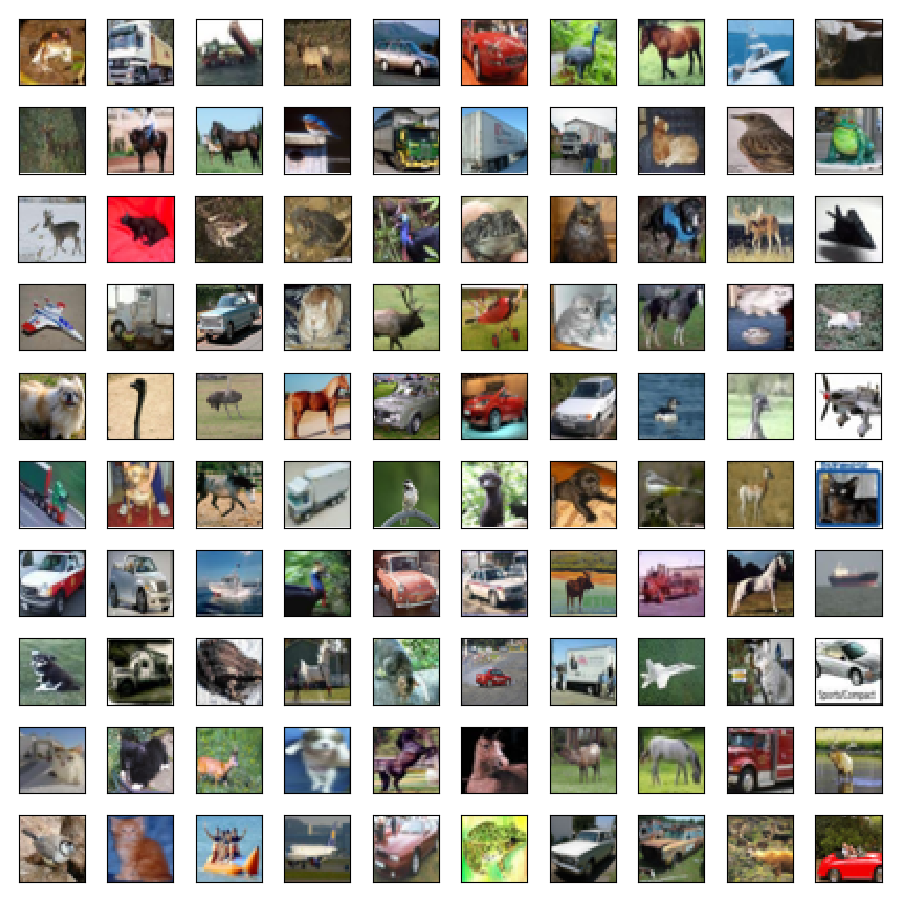

In [13]:
display(plotImages(x_train,n_images=10))

##### Initial Model Training ParametersParameter Setup

1. **Batch Size** - Defines the number of samples that will be propagated through the network.<br>
    We will use a batch size of **32** in this Lab
    
2. **Number of Classes**<br>
    CIFAR10 Dataset has **10** target classes
    
3. **Epochs** - Number times that the learning algorithm will run through the entire training dataset.<br>
    We will use **30 Epochs** in this lab to reduce the overall training time

In [15]:
batch_size = 32
num_classes = 10
epochs = 30

##### Preprocessing Steps
1. Convert class vectors to binary class matrices
2. Cast PIXEL Values to FLOAT
3. Normalize Pixel RGB Values to (0:1)

In [17]:
#1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
#2
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#3
x_train /= 255
x_test /= 255

##### Step 3 - Define Convolution Network

In [19]:
def initializeModel():
  model = Sequential()

  model.add(Conv2D(32, (3, 3), padding='same',
                   input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  return model


In [20]:
model = initializeModel()

In [21]:
## Print Model Summary
model.summary()

_________________________________________________________________
Layer (type) Output Shape Param # 
=================================================================
conv2d_1 (Conv2D) (None, 32, 32, 32) 896 
_________________________________________________________________
activation_1 (Activation) (None, 32, 32, 32) 0 
_________________________________________________________________
conv2d_2 (Conv2D) (None, 30, 30, 32) 9248 
_________________________________________________________________
activation_2 (Activation) (None, 30, 30, 32) 0 
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32) 0 
_________________________________________________________________
dropout_1 (Dropout) (None, 15, 15, 32) 0 
_________________________________________________________________
conv2d_3 (Conv2D) (None, 15, 15, 64) 18496 
_________________________________________________________________
activation_3 (Activation) (None, 15, 15, 64) 0 
_________________________________________________________________
conv2d_4 (Conv2D) (None, 13, 13, 64) 36928 
_________________________________________________________________
activation_4 (Activation) (None, 13, 13, 64) 0 
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64) 0 
_________________________________________________________________
dropout_2 (Dropout) (None, 6, 6, 64) 0 
_________________________________________________________________
flatten_1 (Flatten) (None, 2304) 0 
_________________________________________________________________
dense_1 (Dense) (None, 512) 1180160 
_________________________________________________________________
activation_5 (Activation) (None, 512) 0 
_________________________________________________________________
dropout_3 (Dropout) (None, 512) 0 
_________________________________________________________________
dense_2 (Dense) (None, 10) 5130 
_________________________________________________________________
activation_6 (Activation) (None, 10) 0 
=================================================================
Total params: 1,250,858
Trainable params: 1,250,858
Non-trainable params: 0
_________________________________________________________________

##### Step 4 - Define Optimizers and Compile the model

**Optimization algorithms** are used to minimize (or maximize) an Objective function (also called Error function) E(x) which is mathematical function dependent on the Model’s internal learnable parameters that are used in computing the target values(Y) from the set of predictors(X) used by the machine learning model. In neural networks the Weights(W) and the Bias(b) values are the learnable parameters which are used in computing the output values and are learned and updated in the direction of best solution i.e minimizing the Loss by the network’s training process.

Below are som of the most used optimizers available in Keras:
1. Stochastic Gradient Descent (SGD)
2. Root Mean Square Propagation (RMSProp)
3. Adaptive Gradient (ADAGrad)
4. Adaptive Moment Estimation (ADAM)
  
**Hyper Parameters**
  Two hyper parameters used by most optimizers are:
  1. Learning Rate - Learning rate (lr) controls the magnitude of adjustment of the weights of the neural network with respect the loss gradient.
  2. Decay - Weight decay is a regularization term that causes weights to exponentially decay to zero and hence penalizes big weights.

In [23]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

##### Step 5 - Model Training : without Data Augmentation (Takes 5-8 Mins)

In [25]:
from keras.callbacks import History 
history_noAug = History()
print('Not using data augmentation.')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True,
         callbacks=[history_noAug],
         verbose=1)

Not using data augmentation.
Train on 50000 samples, validate on 10000 samples
Epoch 1/30

 32/50000 [..............................] - ETA: 30:43 - loss: 2.3411 - acc: 0.0938
 192/50000 [..............................] - ETA: 5:22 - loss: 2.3074 - acc: 0.0990 
 320/50000 [..............................] - ETA: 3:20 - loss: 2.3108 - acc: 0.1031
 480/50000 [..............................] - ETA: 2:19 - loss: 2.3065 - acc: 0.1104
 640/50000 [..............................] - ETA: 1:49 - loss: 2.3068 - acc: 0.1219
 800/50000 [..............................] - ETA: 1:30 - loss: 2.3047 - acc: 0.1237
 960/50000 [..............................] - ETA: 1:18 - loss: 2.3058 - acc: 0.1219
 1120/50000 [..............................] - ETA: 1:09 - loss: 2.3037 - acc: 0.1223
 1280/50000 [..............................] - ETA: 1:02 - loss: 2.3023 - acc: 0.1258
 1440/50000 [..............................] - ETA: 56s - loss: 2.3011 - acc: 0.1278 
 1600/50000 [..............................] - ETA: 52s - loss: 2.2983 - acc: 0.1275
 1760/50000 [>.............................] - ETA: 49s - loss: 2.2942 - acc: 0.1364
 1920/50000 [>.............................] - ETA: 46s - loss: 2.2933 - acc: 0.1339
 2112/50000 [>.............................] - ETA: 43s - loss: 2.2930 - acc: 0.1293
 2304/50000 [>.............................] - ETA: 40s - loss: 2.2927 - acc: 0.1302
 2464/50000 [>.............................] - ETA: 39s - loss: 2.2922 - acc: 0.1319
 2656/50000 [>.............................] - ETA: 37s - loss: 2.2900 - acc: 0.1333
 2848/50000 [>.............................] - ETA: 35s - loss: 2.2873 - acc: 0.1355
 3008/50000 [>.............................] - ETA: 34s - loss: 2.2871 - acc: 0.1356
 3200/50000 [>.............................] - ETA: 32s - loss: 2.2848 - acc: 0.1356
 3392/50000 [=>............................] - ETA: 31s - loss: 2.2832 - acc: 0.1392
 3552/50000 [=>............................] - ETA: 31s - loss: 2.2807 - acc: 0.1413
 3744/50000 [=>............................] - ETA: 30s - loss: 2.2786 - acc: 0.1429
 3936/50000 [=>............................] - ETA: 29s - loss: 2.2753 - acc: 0.1438
 4096/50000 [=>............................] - ETA: 28s - loss: 2.2725 - acc: 0.1445
 4224/50000 [=>............................] - ETA: 28s - loss: 2.2695 - acc: 0.1470
 4416/50000 [=>............................] - ETA: 27s - loss: 2.2669 - acc: 0.1474
 4608/50000 [=>............................] - ETA: 26s - loss: 2.2639 - acc: 0.1491
 4768/50000 [=>............................] - ETA: 26s - loss: 2.2615 - acc: 0.1489
 4960/50000 [=>............................] - ETA: 25s - loss: 2.2568 - acc: 0.1526
 5152/50000 [==>...........................] - ETA: 25s - loss: 2.2530 - acc: 0.1549
 5312/50000 [==>...........................] - ETA: 24s - loss: 2.2486 - acc: 0.1566
 5504/50000 [==>...........................] - ETA: 24s - loss: 2.2440 - acc: 0.1586
 5696/50000 [==>...........................] - ETA: 23s - loss: 2.2396 - acc: 0.1624
 5888/50000 [==>...........................] - ETA: 23s - loss: 2.2357 - acc: 0.1637
 6080/50000 [==>...........................] - ETA: 22s - loss: 2.2306 - acc: 0.1651
 6272/50000 [==>...........................] - ETA: 22s - loss: 2.2261 - acc: 0.1677
 6464/50000 [==>...........................] - ETA: 22s - loss: 2.2231 - acc: 0.1686
 6656/50000 [==>...........................] - ETA: 21s - loss: 2.2177 - acc: 0.1699
 6848/50000 [===>..........................] - ETA: 21s - loss: 2.2122 - acc: 0.1726
 7040/50000 [===>..........................] - ETA: 20s - loss: 2.2093 - acc: 0.1747
 7232/50000 [===>..........................] - ETA: 20s - loss: 2.2050 - acc: 0.1755
 7392/50000 [===>..........................] - ETA: 20s - loss: 2.2012 - acc: 0.1780
 7584/50000 [===>..........................] - ETA: 20s - loss: 2.1959 - acc: 0.1806
 7776/50000 [===>..........................] - ETA: 19s - loss: 2.1914 - acc: 0.1818
 7968/50000 [===>..........................] - ETA: 19s - loss: 2.1861 - acc: 0.

###### Evaluate the model (to Get final test accuracy and loss)

In [27]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])
print('Test loss:', score[0])

Test accuracy: 0.7625
Test loss: 0.6957801717758179

##### Visualize Model metrics

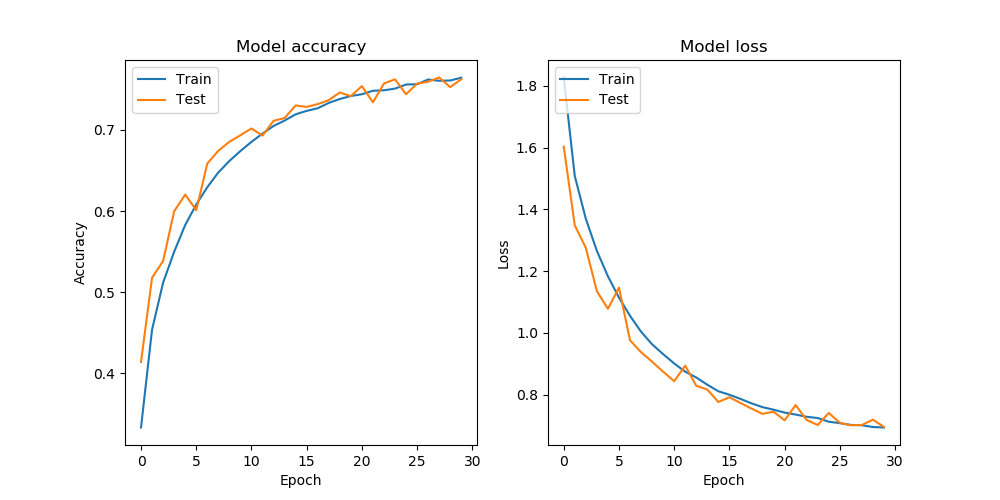

In [29]:
pltoutput = plotmetrics(history_noAug)
display(pltoutput)

Save Trained Model (without Data Augmentation) to DBFS as HDF5 file

In [31]:
## Create Output Model Directory
dbutils.fs.mkdirs('/CIFAR10/models/')

Out[16]: True

In [32]:
modelpath = '/dbfs/CIFAR10/models/CIFAR10_30epoch_withoutDA.h5'
model.save(modelpath)

##### Step 6 - Model Training with Data Augmentation (Takes 5-10 Minutes)

In [34]:
model = initializeModel()
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [35]:
from keras.callbacks import History 
history_Aug = History()
print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

# Fit the model on the batches generated by datagen.flow().
model.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                     callbacks=[history_Aug],
                   verbose =1)

Using real-time data augmentation.
Epoch 1/30

 1/1562 [..............................] - ETA: 11:34 - loss: 2.2970 - acc: 0.2188
 6/1562 [..............................] - ETA: 2:11 - loss: 2.3287 - acc: 0.1042 
 11/1562 [..............................] - ETA: 1:20 - loss: 2.3163 - acc: 0.1136
 15/1562 [..............................] - ETA: 1:04 - loss: 2.3050 - acc: 0.1125
 20/1562 [..............................] - ETA: 53s - loss: 2.3088 - acc: 0.0984 
 24/1562 [..............................] - ETA: 47s - loss: 2.3096 - acc: 0.0951
 29/1562 [..............................] - ETA: 42s - loss: 2.3056 - acc: 0.0981
 34/1562 [..............................] - ETA: 38s - loss: 2.3051 - acc: 0.1011
 39/1562 [..............................] - ETA: 35s - loss: 2.3055 - acc: 0.1026
 44/1562 [..............................] - ETA: 33s - loss: 2.3047 - acc: 0.1044
 49/1562 [..............................] - ETA: 31s - loss: 2.3033 - acc: 0.1046
 54/1562 [>.............................] - ETA: 30s - loss: 2.3006 - acc: 0.1076
 59/1562 [>.............................] - ETA: 28s - loss: 2.2981 - acc: 0.1123
 64/1562 [>.............................] - ETA: 27s - loss: 2.2959 - acc: 0.1152
 69/1562 [>.............................] - ETA: 26s - loss: 2.2947 - acc: 0.1168
 74/1562 [>.............................] - ETA: 25s - loss: 2.2915 - acc: 0.1191
 80/1562 [>.............................] - ETA: 24s - loss: 2.2894 - acc: 0.1219
 86/1562 [>.............................] - ETA: 24s - loss: 2.2875 - acc: 0.1195
 90/1562 [>.............................] - ETA: 23s - loss: 2.2854 - acc: 0.1208
 96/1562 [>.............................] - ETA: 23s - loss: 2.2823 - acc: 0.1227
 102/1562 [>.............................] - ETA: 22s - loss: 2.2793 - acc: 0.1265
 108/1562 [=>............................] - ETA: 21s - loss: 2.2763 - acc: 0.1288
 114/1562 [=>............................] - ETA: 21s - loss: 2.2740 - acc: 0.1302
 120/1562 [=>............................] - ETA: 20s - loss: 2.2691 - acc: 0.1331
 125/1562 [=>............................] - ETA: 20s - loss: 2.2647 - acc: 0.1355
 130/1562 [=>............................] - ETA: 20s - loss: 2.2595 - acc: 0.1397
 135/1562 [=>............................] - ETA: 20s - loss: 2.2565 - acc: 0.1412
 140/1562 [=>............................] - ETA: 20s - loss: 2.2522 - acc: 0.1437
 145/1562 [=>............................] - ETA: 19s - loss: 2.2473 - acc: 0.1457
 150/1562 [=>............................] - ETA: 19s - loss: 2.2433 - acc: 0.1473
 155/1562 [=>............................] - ETA: 19s - loss: 2.2400 - acc: 0.1494
 160/1562 [==>...........................] - ETA: 19s - loss: 2.2361 - acc: 0.1520
 165/1562 [==>...........................] - ETA: 19s - loss: 2.2332 - acc: 0.1521
 170/1562 [==>...........................] - ETA: 18s - loss: 2.2289 - acc: 0.1542
 175/1562 [==>...........................] - ETA: 18s - loss: 2.2262 - acc: 0.1548
 180/1562 [==>...........................] - ETA: 18s - loss: 2.2217 - acc: 0.1573
 184/1562 [==>...........................] - ETA: 18s - loss: 2.2169 - acc: 0.1593
 189/1562 [==>...........................] - ETA: 18s - loss: 2.2143 - acc: 0.1609
 194/1562 [==>...........................] - ETA: 18s - loss: 2.2107 - acc: 0.1629
 199/1562 [==>...........................] - ETA: 18s - loss: 2.2077 - acc: 0.1644
 204/1562 [==>...........................] - ETA: 18s - loss: 2.2038 - acc: 0.1668
 209/1562 [===>..........................] - ETA: 17s - loss: 2.1987 - acc: 0.1690
 214/1562 [===>..........................] - ETA: 17s - loss: 2.1959 - acc: 0.1697
 219/1562 [===>..........................] - ETA: 17s - loss: 2.1928 - acc: 0.1708
 224/1562 [===>..........................] - ETA: 17s - loss: 2.1931 - acc: 0.1709
 229/1562 [===>..........................] - ETA: 17s - loss: 2.1904 - acc: 0.1726
 234/1562 [===>..........................] - ETA: 17s - loss: 2.1862 - acc: 0.1744
 239/1562 [===>..........................] - ETA: 17s - loss: 2.183

###### Evaluate the model (to Get final test accuracy and loss)

In [37]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])
print('Test loss:', score[0])

Test accuracy: 0.7531
Test loss: 0.7225867984771729

##### Visualize Model metrics

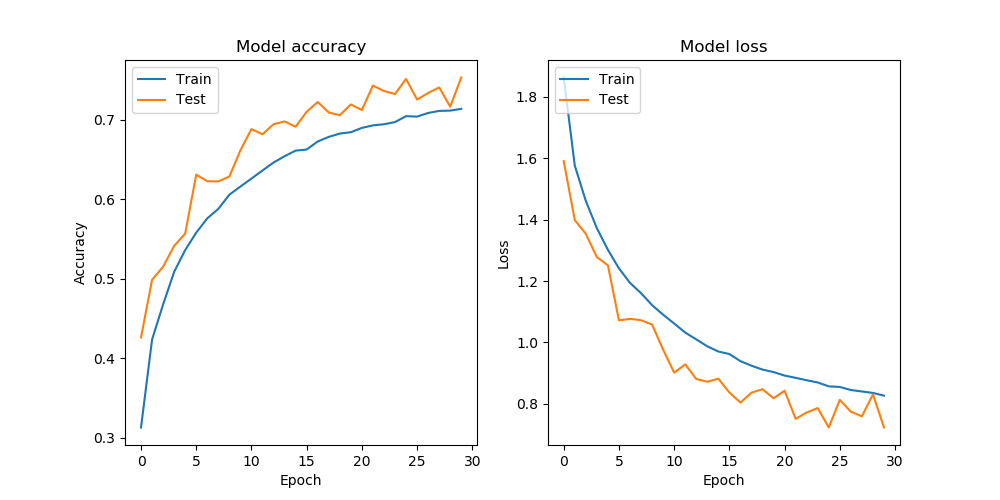

In [39]:
pltoutput = plotmetrics(history_Aug)
display(pltoutput)

Save Trained Model (with Data Augmentation) to DBFS as HDF5 file

In [41]:
modelpath = '/dbfs/CIFAR10/models/CIFAR10_30epoch_withDA.h5'
model.save(modelpath)

Validate existence of output model files

In [43]:
dbutils.fs.ls('/CIFAR10/models/')

Out[23]: 
[FileInfo(path='dbfs:/CIFAR10/models/CIFAR10_30epoch_withDA.h5', name='CIFAR10_30epoch_withDA.h5', size=0),
 FileInfo(path='dbfs:/CIFAR10/models/CIFAR10_30epoch_withoutDA.h5', name='CIFAR10_30epoch_withoutDA.h5', size=10054056)]

#### Summary
The process of building Deep Learning models on Azure Databricks can be summarized as :

1. **Setup/Configuration:**<br>
  * Cluster creation and configuration.
  * Library installation (optional)<br>
2. **Data Processing:**<br>
  * Data Ingestion
  * Data Preparation/Feature Engineering<br>
  * Data Augmentation<br>
3. **Modeling:**<br>
  * Network definition
  * Hyper Parameter definition/Tuning
  * Model Training
  * Model Evaluation
4. **Deployment**
  * Azure Machine Learning Service
  * IOT Edge
  * Azure Container Service<br>
  <img src="https://github.com/AbidGuroo/DeepLearningJumpstart/blob/master/media/processflow.png?raw=true" alt="Process Flow" width="1000"/>
  ###### Deep Learning on Azure Databricks – Process Flow